In [ ]:
# This Colab notebook was written by Varshitha


In [4]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install scipy
!pip install seaborn
!pip install tensorflow

In [5]:
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [6]:
!pip install kaggle


In [7]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sunkaravarshitha","key":"77b07ed2e7b8d6e2d5214033faf69c10"}'}

In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [9]:
!kaggle datasets download -d phucthaiv02/butterfly-image-classification


Dataset URL: https://www.kaggle.com/datasets/phucthaiv02/butterfly-image-classification
License(s): CC0-1.0
 56% 126M/226M [00:00<00:00, 1.31GB/s]
100% 226M/226M [00:00<00:00, 669MB/s] 


In [10]:
import zipfile
import os

zip_file_path = '/content/butterfly-image-classification.zip'
extracted_path = '/content/butterfly_images' # Or any preferred directory name

# Create the extraction directory if it doesn't exist
os.makedirs(extracted_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

print(f"Successfully extracted data to: {extracted_path}")

Successfully extracted data to: /content/butterfly_images


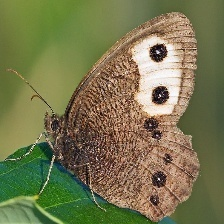

In [11]:
import os
import random
from IPython.display import Image, display

folder_path = '/content/butterfly_images'

image_files = []
for root, _, files in os.walk(folder_path):
    for f in files:
        if f.lower().endswith(('.jpg', '.png', '.jpeg')):
            image_files.append(os.path.join(root, f))

if not image_files:
    print(f"No image files found in {folder_path}")
else:
    selected_image = random.choice(image_files)

    display(Image(filename=selected_image))

Showing: /content/butterfly_images/train/Image_1418.jpg


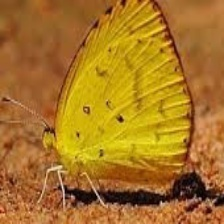

In [12]:
import os
import random
from IPython.display import Image, display

# ✅ Specify the path to your image folder
folder_path = '/content/butterfly_images'


image_files = []
for root, _, files in os.walk(folder_path):
    for f in files:
        if f.lower().endswith(('.jpg', '.png', '.jpeg')):
            image_files.append(os.path.join(root, f))

# ✅ Check if any images are found
if not image_files:
    print(f"No image files found in {folder_path}")
else:
    # 🎯 Select and display a random image
    selected_image = random.choice(image_files)
    image_path = os.path.join(folder_path, selected_image)
    print(f"Showing: {image_path}")
    display(Image(filename=image_path))


In [13]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

In [14]:
vgg = VGG16(include_top = False, input_shape = (224,224,3))


In [15]:
for layer in vgg.layers:
  print(layer)

<InputLayer name=input_layer_1, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<MaxPooling2D name=block4_pool, built=True>
<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<MaxPooling2D name=block5_pool, built=True>


In [16]:
img_path = '/content/butterfly_images/train/Image_1565.jpg' # Corrected path
import numpy as np
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)

In [17]:
from tensorflow.keras.applications.vgg16 import VGG16

# Load the VGG16 base model without top layers
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))


In [18]:
# Save the VGG16 model as .h5
vgg.save('vgg16_model.h5')

# Download the .h5 file
from google.colab import files
files.download('vgg16_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>